<a href="https://colab.research.google.com/github/AndreyBugrov/MachineLearningCourse/blob/a.bugrov%2Fgit_repositories/github_repositories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# **Оценка стоимости квартиры**


# 1. Загружаем данные

Загружаем файл из интернета:

Предварительно загрузить файл `repositories.csv` в папку для текущей сессии

In [ ]:
url = "repositories.csv"
data_raw = pd.read_csv(url)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Точно так же можно загрузить файл с локального диска, только вместо `url` надо указать путь. Однако если вы пользуетесь colab, то чтобы загрузить файл с локального диска придется поступить по-другому:

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# import io
# data_raw = pd.read_csv(io.BytesIO(uploaded['repositories.csv']))

Таблица содержит данные о более, чем 215 тысячах репозиториев, являющихся лучшиими проектами по количеству звёзд, начиная со 167. Содержит много полезной информации (атрибутов).

Вначале посмотрим на размеры таблицы: количество строк (каждая строка соответствует одной квартире) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [ ]:
data_raw.shape

(215029, 24)

Получаем, что количество данных - 215029, количество признаков - 24. Человек это не прочтёт!

In [ ]:
data_raw

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,True,True,True,False,True,False,False,False,False,main
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2023-09-21T11:09:25Z,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,True,False,True,False,True,False,False,False,False,main
2,awesome,😎 Awesome lists about all kinds of interesting...,https://github.com/sindresorhus/awesome,2014-07-11T13:42:37Z,2023-09-21T11:18:22Z,NaN,1441,269997,26485,61,...,True,False,True,False,True,False,False,False,False,main
3,996.ICU,Repo for counting stars and contributing. Pres...,https://github.com/996icu/996.ICU,2019-03-26T07:31:14Z,2023-09-21T08:09:01Z,https://996.icu,187799,267901,21497,16712,...,False,False,True,False,False,False,False,True,False,master
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06T02:34:12Z,2023-09-21T10:54:48Z,NaN,20998,265161,69434,56,...,True,False,True,False,False,False,False,False,False,main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215024,puppet-virt,Puppet Module for Virtualization Management,https://github.com/carlasouza/puppet-virt,2010-06-06T21:42:34Z,2023-01-27T12:13:50Z,http://puppetlabs.com,573,167,73,11,...,True,True,False,True,False,False,False,False,False,master
215025,BounceProgressBar,Android BounceProgressBar Widget,https://github.com/zhengxiaopeng/BounceProgres...,2014-11-17T12:19:13Z,2022-11-29T16:50:03Z,NaN,2219,167,36,2,...,True,True,True,True,False,False,False,False,False,master
215026,egghead-angularjs-from-scratch-getting-started,NaN,https://github.com/eggheadio/egghead-angularjs...,2014-08-04T12:56:15Z,2022-03-13T19:20:21Z,NaN,81,167,221,2,...,True,True,True,True,False,False,False,False,False,master
215027,Pcode,Python 3 IDE,https://github.com/fortharris/Pcode,2013-07-29T08:55:29Z,2022-12-15T13:11:25Z,NaN,15617,167,24,4,...,True,True,True,True,False,False,False,False,False,master


Метод `data_raw.head()` отображает первые строки (по умолчанию, 5 строк) таблицы

In [ ]:
data_raw.head(15)

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,True,True,True,False,True,False,False,False,False,main
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2023-09-21T11:09:25Z,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,True,False,True,False,True,False,False,False,False,main
2,awesome,😎 Awesome lists about all kinds of interesting...,https://github.com/sindresorhus/awesome,2014-07-11T13:42:37Z,2023-09-21T11:18:22Z,NaN,1441,269997,26485,61,...,True,False,True,False,True,False,False,False,False,main
3,996.ICU,Repo for counting stars and contributing. Pres...,https://github.com/996icu/996.ICU,2019-03-26T07:31:14Z,2023-09-21T08:09:01Z,https://996.icu,187799,267901,21497,16712,...,False,False,True,False,False,False,False,True,False,master
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06T02:34:12Z,2023-09-21T10:54:48Z,NaN,20998,265161,69434,56,...,True,False,True,False,False,False,False,False,False,main
5,public-apis,A collective list of free APIs,https://github.com/public-apis/public-apis,2016-03-20T23:49:42Z,2023-09-21T11:22:06Z,http://public-apis.org,5088,256615,29254,191,...,True,False,True,False,False,False,False,False,False,master
6,developer-roadmap,"Interactive roadmaps, guides and other educati...",https://github.com/kamranahmedse/developer-roa...,2017-03-15T13:45:52Z,2023-09-21T11:32:17Z,https://roadmap.sh,2267461,251416,34927,643,...,True,False,True,True,True,False,False,False,False,master
7,system-design-primer,Learn how to design large-scale systems. Prep ...,https://github.com/donnemartin/system-design-p...,2017-02-26T16:15:28Z,2023-09-21T11:32:17Z,NaN,11187,229569,40474,393,...,True,True,True,True,False,False,False,False,False,master
8,build-your-own-x,Master programming by recreating your favorite...,https://github.com/codecrafters-io/build-your-...,2018-05-09T12:03:18Z,2023-09-21T11:23:44Z,https://codecrafters.io,974,217627,21159,282,...,True,False,True,False,False,False,False,False,False,master
9,react,The library for web and native user interfaces,https://github.com/facebook/react,2013-05-24T16:15:54Z,2023-09-21T11:37:15Z,https://react.dev,345964,213299,44842,1497,...,True,True,True,True,True,False,False,False,False,main


А вот последние строки:

In [ ]:
data_raw.tail()

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
215024,puppet-virt,Puppet Module for Virtualization Management,https://github.com/carlasouza/puppet-virt,2010-06-06T21:42:34Z,2023-01-27T12:13:50Z,http://puppetlabs.com,573,167,73,11,...,True,True,False,True,False,False,False,False,False,master
215025,BounceProgressBar,Android BounceProgressBar Widget,https://github.com/zhengxiaopeng/BounceProgres...,2014-11-17T12:19:13Z,2022-11-29T16:50:03Z,NaN,2219,167,36,2,...,True,True,True,True,False,False,False,False,False,master
215026,egghead-angularjs-from-scratch-getting-started,NaN,https://github.com/eggheadio/egghead-angularjs...,2014-08-04T12:56:15Z,2022-03-13T19:20:21Z,NaN,81,167,221,2,...,True,True,True,True,False,False,False,False,False,master
215027,Pcode,Python 3 IDE,https://github.com/fortharris/Pcode,2013-07-29T08:55:29Z,2022-12-15T13:11:25Z,NaN,15617,167,24,4,...,True,True,True,True,False,False,False,False,False,master
215028,react-hooks,Fire off actions in stateless components.,https://github.com/tj/react-hooks,2016-09-19T23:26:58Z,2023-09-01T07:10:16Z,NaN,3,167,9,3,...,True,True,True,True,False,False,False,False,False,master


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215029 entries, 0 to 215028
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Name             215027 non-null  object
 1   Description      206997 non-null  object
 2   URL              215029 non-null  object
 3   Created At       215029 non-null  object
 4   Updated At       215029 non-null  object
 5   Homepage         78390 non-null   object
 6   Size             215029 non-null  int64 
 7   Stars            215029 non-null  int64 
 8   Forks            215029 non-null  int64 
 9   Issues           215029 non-null  int64 
 10  Watchers         215029 non-null  int64 
 11  Language         198953 non-null  object
 12  License          161990 non-null  object
 13  Topics           215029 non-null  object
 14  Has Issues       215029 non-null  bool  
 15  Has Projects     215029 non-null  bool  
 16  Has Downloads    215029 non-null  bool  
 17  Has Wiki  

Мы видим, что столбцы (признаки) имеют имена


0.   `Name` - Название репозитория GitHub
2.   `Description      ` - Краткое текстовое описание, в котором кратко излагается цель или направленность репозитория
1.   `URL              ` - URL-адрес или веб-адрес, который ссылается на репозиторий GitHub, являющийся уникальным идентификатором репозитория
2.   `Created At` - Дата и время первоначального создания репозитория на GitHub в формате `ISO 8601`
1.  `Updated At       ` - Дата и время последнего обновления или модификации репозитория в формате `ISO 8601`
1. `Homepage         ` - URL-адрес домашней страницы или целевой страницы, связанной с хранилищем, предоставляющий дополнительную информацию или ресурсы
2.   ` Size` - Размер репозитория в байтах, указывающий общее пространство для хранения, используемое файлами и данными репозитория
1.   `Stars            ` - Количество звездочек или лайков, которые репозиторий получил от других пользователей GitHub, указывающее на его популярность
2.   `Forks            ` - Количество раз, когда репозиторий был разветвлён другими пользователями GitHub
1.   `Issues           ` - Общее количество открытых систем учёта ошибок
2.   `Watchers         ` - Количество пользователей GitHub, которые "следят" за репозиторием на предмет обновлений и изменений
1.   `Language         ` - Основной язык программирования          
2.  `License          ` - Информация о лицензии на программное обеспечение с использованием идентификатора лицензии
1.   `Topics           ` - Список тем или тегов, связанных с репозиторием, помогающий пользователям находить связанные проекты и темы, представляющие интерес
2.   `Has Issues` - Логическое значение, указывающее, включена ли в репозитории систем учёта ошибок. Если это значение равно true, это означает, что в нём есть система учёта ошибок
1.   `Has Projects` - Логическое значение, указывающее, использует ли репозиторий проекты GitHub для управления и организации задач и рабочих элементов
2.   `Has Downloads` - Логическое значение, указывающее, предлагает ли репозиторий загружаемые файлы или ресурсы пользователям
1.   `Has Wiki` - Логическое значение, указывающее, есть ли в репозитории связанная вики-страница с дополнительной документацией и информацией
2.   ` Has Pages` - Логическое значение, указывающее, включены ли в репозитории страницы GitHub, позволяющие создать веб-сайт, связанный с репозиторием
1.   `Has Discussions` - Логическое значение, указывающее, включены ли в репозитории GitHub Discussions, позволяющие проводить обсуждения в сообществе и совместную работу
2.   `Is Fork` - Логическое значение, указывающее, является ли репозиторий ответвлением другого репозитория. Если это значение равно false, это означает, что репозиторий - не ответвление
1.   `Is Archived` - Логическое значение, указывающее, заархивирован ли репозиторий. Архивированные репозитории обычно доступны только для чтения и больше активно не поддерживаются
2.   `Is Template` - Логическое значение, указывающее, настроен ли репозиторий как шаблон
1.   `Default Branch` - Имя ветки по умолчанию.

Требуется предсказать количественный признак `Price` по остальным признакам. Это *задача восстановления регрессии*.

Типы признаков:

- Качественные (*категориальные*, *факторные*):
  - Неупорядоченные (*номинальные*). Присутствуют. Пример: имя, язык, лицензия.
  - Упорядоченные (*порядковые*). Присутствуют. Даты создания и редактирования.
- Количественные (*числовые*):
  - *Непрерывные*. Присутствует единственный представитель - размер.
  - *Дискретные*. Присутствуют. Все остальные числовые признаки.

*Бинарные* признаки (которые принимают только два значения) можно считать и номинальными, и порядковыми, и дискретными. Все значения типа bool.    

Столбцы `'Building'` и `'Type'` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [ ]:
data_raw['Name'] = data_raw['Name'].astype('category')
data_raw['Description'] = data_raw['Description'].astype('category')
data_raw['URL'] = data_raw['URL'].astype('category')
data_raw['Created At'] = data_raw['Created At'].astype('category')
data_raw['Updated At'] = data_raw['Updated At'].astype('category')
data_raw['Homepage'] = data_raw['Homepage'].astype('category')
data_raw['Language'] = data_raw['URL'].astype('category')
data_raw['License'] = data_raw['URL'].astype('category')
data_raw['Topics'] = data_raw['URL'].astype('category')
data_raw['Default Branch'] = data_raw['Default Branch'].astype('category')

In [ ]:
data_raw['Name'].dtype

CategoricalDtype(categories=['-', '--', '---', '--Awesome-Python--', '--Java', '--shots',
                  '-837-', '-Baseline-check',
                  '-CollectionViewLayout-CollectionViewFlowLayout-',
                  '-Computer-Basics-Notes',
                  ...
                  'zyre', 'zys', 'zytrax', 'zz',
                  'zzarchive-VisualFSharpPowerTools', 'zzhack', 'zzkia',
                  'zzuf', 'zzuli-healthreport', 'zzzzz'],
, ordered=False)

In [ ]:
data_raw['Default Branch'].dtype

CategoricalDtype(categories=['$(./pw3n)', '0.0.1', '0.1', '0.1.x', '0.10', '0.11.0',
                  '0.11.x', '0.13', '0.14.x', '0.16.x',
                  ...
                  'zh-hans', 'zh_tw', 'zlm', 'zoff99/dev003', 'zoom',
                  'zygisk_module', '开发分支', '自由浏览-3.2.5', '🐟', '👀'],
, ordered=False)

Информация о числовых признаках:

In [ ]:
data_raw.describe()

,Size,Stars,Forks,Issues,Watchers
count,2.150290e+05,215029.000000,215029.000000,215029.000000,215029.000000
mean,5.428270e+04,1115.085142,234.207637,37.925178,1115.085142
std,7.023978e+05,3992.372050,1242.967451,196.508610,3992.372050
min,0.000000e+00,167.000000,0.000000,0.000000,167.000000
25%,3.780000e+02,237.000000,39.000000,3.000000,237.000000
50%,2.389000e+03,377.000000,79.000000,10.000000,377.000000
75%,1.528200e+04,797.000000,174.000000,28.000000,797.000000
max,1.050786e+08,374074.000000,243339.000000,26543.000000,374074.000000


Информация о категориальных признаках

In [ ]:
data_raw.describe(include=['category'])

,Name,Description,URL,Created At,Updated At,Homepage,Language,License,Topics,Default Branch
count,215027,206997,215029,215029,215029,78390,215029,215029,215029,215029
unique,196820,206109,215029,214922,193011,74197,215029,215029,215029,2326
top,dotfiles,Migrated:,https://github.com/0-8-4/miui-auto-tasks,2017-06-05T20:53:58Z,2023-09-21T10:55:19Z,https://spatie.be/open-source,https://github.com/0-8-4/miui-auto-tasks,https://github.com/0-8-4/miui-auto-tasks,https://github.com/0-8-4/miui-auto-tasks,master
freq,200,41,1,3,15,32,1,1,1,162808


Имена столбцов (признаков) можно получить таким образом:

In [ ]:
data_raw.columns

Index(['Name', 'Description', 'URL', 'Created At', 'Updated At', 'Homepage',
       'Size', 'Stars', 'Forks', 'Issues', 'Watchers', 'Language', 'License',
       'Topics', 'Has Issues', 'Has Projects', 'Has Downloads', 'Has Wiki',
       'Has Pages', 'Has Discussions', 'Is Fork', 'Is Archived', 'Is Template',
       'Default Branch'],
      dtype='object')

Имена строк (совпадают с индексами):

In [ ]:
data_raw.index

RangeIndex(start=0, stop=215029, step=1)

In [ ]:
data_raw['Name']

0                                           freeCodeCamp
1                                 free-programming-books
2                                                awesome
3                                                996.ICU
4                            coding-interview-university
                               ...                      
215024                                       puppet-virt
215025                                 BounceProgressBar
215026    egghead-angularjs-from-scratch-getting-started
215027                                             Pcode
215028                                       react-hooks
Name: Name, Length: 215029, dtype: category
Categories (196820, object): ['-', '--', '---', '--Awesome-Python--', ..., 'zzkia', 'zzuf',
                              'zzuli-healthreport', 'zzzzz']

Pandas реализует 2 основных класса: `Series`, `DataFrame`

In [ ]:
data_raw['URL'].dtype

CategoricalDtype(categories=['https://github.com/0-8-4/miui-auto-tasks',
                  'https://github.com/0-duke/wdpassport-utils',
                  'https://github.com/00-Evan/shattered-pixel-dungeon',
                  'https://github.com/0015/ThatProject',
                  'https://github.com/003random/003Recon',
                  'https://github.com/003random/getJS',
                  'https://github.com/007gzs/dingtalk-sdk',
                  'https://github.com/007gzs/meeting',
                  'https://github.com/007revad/Synology_HDD_db',
                  'https://github.com/007revad/Synology_M2_volume',
                  ...
                  'https://github.com/zzzprojects/findandreplace',
                  'https://github.com/zzzprojects/html-agility-pack',
                  'https://github.com/zzzprojects/nmemory',
                  'https://github.com/zzzprojects/sqlfiddle',
                  'https://github.com/zzzprojects/sqlfiddle2',
                  'https://

## Пропущенные значения:

In [ ]:
data_raw.isnull().sum()

Name                    2
Description          8032
URL                     0
Created At              0
Updated At              0
Homepage           136639
Size                    0
Stars                   0
Forks                   0
Issues                  0
Watchers                0
Language                0
License                 0
Topics                  0
Has Issues              0
Has Projects            0
Has Downloads           0
Has Wiki                0
Has Pages               0
Has Discussions         0
Is Fork                 0
Is Archived             0
Is Template             0
Default Branch          0
dtype: int64

Найдём процент пропущенных значений:

In [ ]:
percent_missing = data_raw.isnull().sum() * 100 / len(data_raw)
print(percent_missing)

Name                0.000930
Description         3.735310
URL                 0.000000
Created At          0.000000
Updated At          0.000000
Homepage           63.544452
Size                0.000000
Stars               0.000000
Forks               0.000000
Issues              0.000000
Watchers            0.000000
Language            0.000000
License             0.000000
Topics              0.000000
Has Issues          0.000000
Has Projects        0.000000
Has Downloads       0.000000
Has Wiki            0.000000
Has Pages           0.000000
Has Discussions     0.000000
Is Fork             0.000000
Is Archived         0.000000
Is Template         0.000000
Default Branch      0.000000
dtype: float64


In [ ]:
[feature for feature in data_raw.columns if data_raw[feature].isnull().sum() > 1]

['Name', 'Description', 'Homepage']

## 2. Визуализируем, анализируем, боремся с выбросами (outliers)

На первый взгляд мне казалось, что количество звёзд больше всего зависит от числа форков. Поэтому я решил строить диаграмму рассеивания для этих признаков: `Stars` и `Forks`.


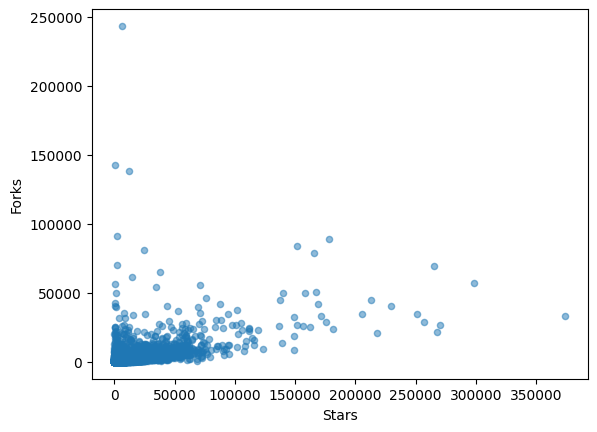

In [ ]:
data_raw.plot(kind='scatter', x='Stars', y='Forks', alpha=0.5)
pass # Можно также заменить на ; или присвоить значение, чтобы результат не отображался

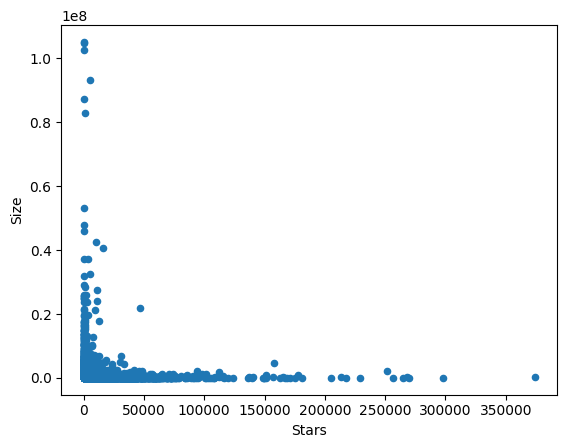

In [ ]:
data_raw.plot(kind='scatter', x='Stars', y='Size')
pass

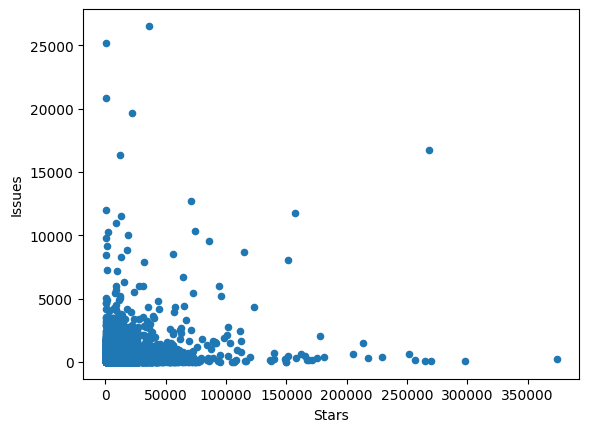

In [ ]:
data_raw.plot(kind='scatter', x='Stars', y='Issues')
pass

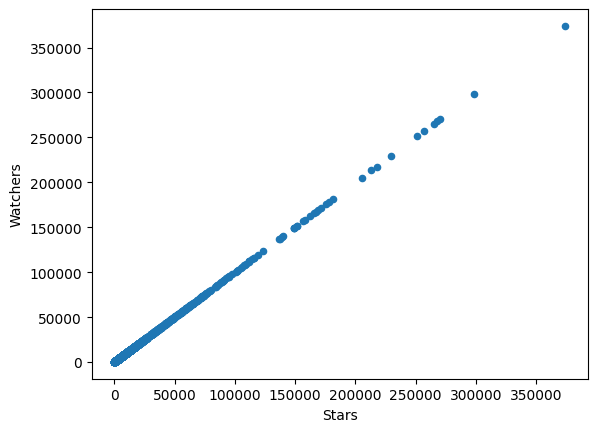

In [ ]:
data_raw.plot(kind='scatter', x='Stars', y='Watchers')
pass

Можно вот так:

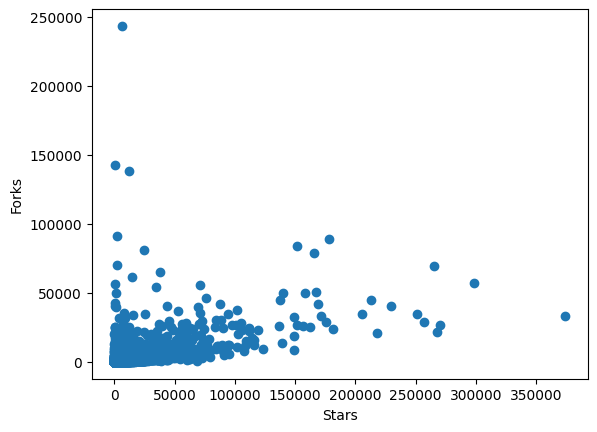

In [ ]:
plt.scatter(data_raw['Stars'], data_raw['Forks'])
plt.xlabel('Stars')
plt.ylabel('Forks')
pass

Все диаграммы рассеивания:

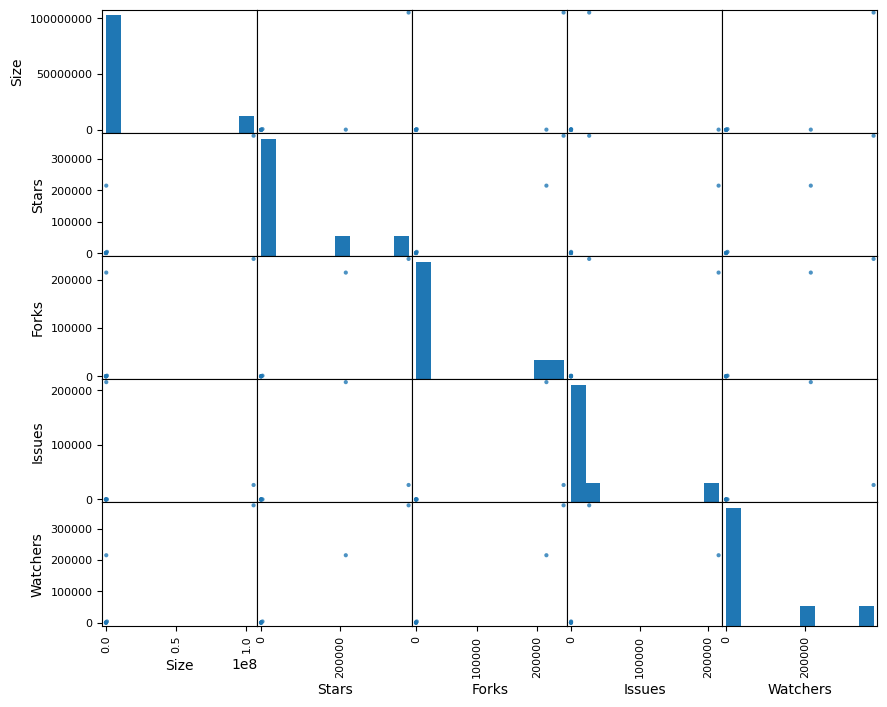

In [ ]:
pd.plotting.scatter_matrix(data_raw.describe(), figsize = (10, 8), alpha=0.8)
pass

In [ ]:
data_raw[data_raw['Stars'] > 150000]

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24T17:49:19Z,2023-09-21T11:32:33Z,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,True,True,True,False,True,False,False,False,False,main
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2023-09-21T11:09:25Z,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,True,False,True,False,True,False,False,False,False,main
2,awesome,😎 Awesome lists about all kinds of interesting...,https://github.com/sindresorhus/awesome,2014-07-11T13:42:37Z,2023-09-21T11:18:22Z,NaN,1441,269997,26485,61,...,True,False,True,False,True,False,False,False,False,main
3,996.ICU,Repo for counting stars and contributing. Pres...,https://github.com/996icu/996.ICU,2019-03-26T07:31:14Z,2023-09-21T08:09:01Z,https://996.icu,187799,267901,21497,16712,...,False,False,True,False,False,False,False,True,False,master
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06T02:34:12Z,2023-09-21T10:54:48Z,NaN,20998,265161,69434,56,...,True,False,True,False,False,False,False,False,False,main
5,public-apis,A collective list of free APIs,https://github.com/public-apis/public-apis,2016-03-20T23:49:42Z,2023-09-21T11:22:06Z,http://public-apis.org,5088,256615,29254,191,...,True,False,True,False,False,False,False,False,False,master
6,developer-roadmap,"Interactive roadmaps, guides and other educati...",https://github.com/kamranahmedse/developer-roa...,2017-03-15T13:45:52Z,2023-09-21T11:32:17Z,https://roadmap.sh,2267461,251416,34927,643,...,True,False,True,True,True,False,False,False,False,master
7,system-design-primer,Learn how to design large-scale systems. Prep ...,https://github.com/donnemartin/system-design-p...,2017-02-26T16:15:28Z,2023-09-21T11:32:17Z,NaN,11187,229569,40474,393,...,True,True,True,True,False,False,False,False,False,master
8,build-your-own-x,Master programming by recreating your favorite...,https://github.com/codecrafters-io/build-your-...,2018-05-09T12:03:18Z,2023-09-21T11:23:44Z,https://codecrafters.io,974,217627,21159,282,...,True,False,True,False,False,False,False,False,False,master
9,react,The library for web and native user interfaces,https://github.com/facebook/react,2013-05-24T16:15:54Z,2023-09-21T11:37:15Z,https://react.dev,345964,213299,44842,1497,...,True,True,True,True,True,False,False,False,False,main


In [ ]:
data_raw[data_raw['Forks'] > 5*10**4]

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11T06:50:37Z,2023-09-21T11:09:25Z,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,True,False,True,False,True,False,False,False,False,main
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06T02:34:12Z,2023-09-21T10:54:48Z,NaN,20998,265161,69434,56,...,True,False,True,False,False,False,False,False,False,main
12,tensorflow,An Open Source Machine Learning Framework for ...,https://github.com/tensorflow/tensorflow,2015-11-07T01:19:20Z,2023-09-21T11:18:14Z,https://tensorflow.org,892377,177727,88940,2066,...,True,True,True,False,False,False,False,False,False,master
16,CS-Notes,:books: 技术面试必备基础知识、Leetcode、计算机操作系统、计算机网络、系统设计,https://github.com/CyC2018/CS-Notes,2018-02-13T14:56:24Z,2023-09-21T11:18:15Z,http://www.cyc2018.xyz,116179,167116,50543,187,...,True,True,True,True,True,False,False,False,False,master
17,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",https://github.com/twbs/bootstrap,2011-07-29T21:19:00Z,2023-09-21T11:18:20Z,https://getbootstrap.com,236221,165352,78906,477,...,True,True,True,False,True,True,False,False,False,main
19,linux,Linux kernel source tree,https://github.com/torvalds/linux,2011-09-04T22:48:12Z,2023-09-21T10:57:52Z,NaN,4695128,157823,50275,310,...,False,True,True,False,False,False,False,False,False,master
21,gitignore,A collection of useful .gitignore templates,https://github.com/github/gitignore,2010-11-08T20:17:14Z,2023-09-21T11:19:09Z,NaN,2356,151549,84060,446,...,False,False,True,False,False,False,False,False,False,main
87,opencv,Open Source Computer Vision Library,https://github.com/opencv/opencv,2012-07-19T09:40:17Z,2023-09-21T11:14:13Z,https://opencv.org,521137,71279,55603,2526,...,True,False,True,True,False,False,False,False,False,4.x
339,first-contributions,🚀✨ Help beginners to contribute to open source...,https://github.com/firstcontributions/first-co...,2016-09-20T14:35:09Z,2023-09-21T11:38:05Z,https://firstcontributions.github.io,30610,37762,65211,260,...,True,True,True,True,False,False,False,False,False,main
391,tutorials,"Just Announced - ""Learn Spring Security OAuth"":",https://github.com/eugenp/tutorials,2013-04-29T18:26:36Z,2023-09-21T10:23:03Z,http://bit.ly/github-lsso,378626,34904,54050,73,...,True,True,True,True,False,False,False,False,False,master


На любой диаграмме рассеивания присутствуют *выбросы* (*outliers*) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадают из общей картины. Зачастую это ошибки в данных. В данном случае это не ошибки, просто такие значения. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется удалять.

Для обнаружения выбросов найдем, например, квантили для признаков `Stars` и `Forks`:

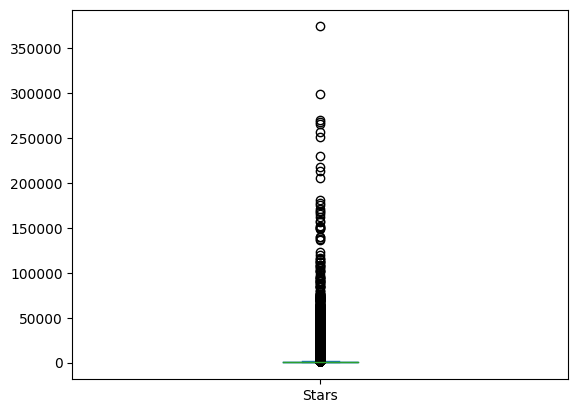

In [ ]:
data_raw['Stars'].plot(kind='box')
pass

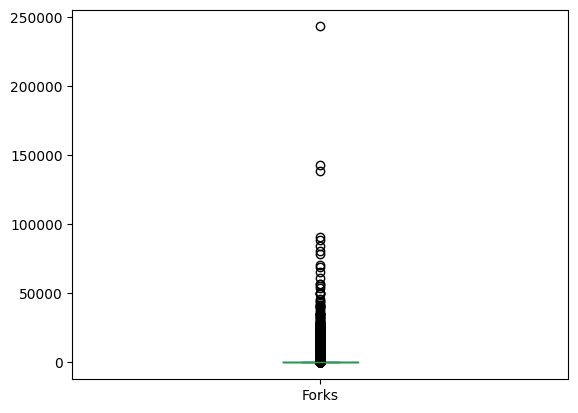

In [ ]:
data_raw['Forks'].plot(kind='box')
pass

In [ ]:
data_raw['Stars'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      168.00
0.010      169.00
0.050      177.00
0.100      190.00
0.500      377.00
0.900     2010.00
0.950     3761.00
0.990    12923.60
0.995    19809.58
Name: Stars, dtype: float64

Мы видим, например, что $99\%$ всех значений признака `'Stars'` находится в диапазоне от $169$ до $19809$ звёзд. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

In [ ]:
data_raw['Forks'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       4.00
0.010       6.00
0.050      14.00
0.100      20.00
0.500      79.00
0.900     411.00
0.950     741.00
0.990    2549.44
0.995    4121.58
Name: Forks, dtype: float64

$99\%$ всех значений `'Forks'` находится в диапазоне от $4$ до $4121$ ответвлений.

Удалим все строки таблицы, в которых `'Stars'` или `'Forks'` выходят за пределы квантилей $0.005$, $0.995$.

In [ ]:
rows_to_drop = data_raw[
    (data_raw['Stars'] < data_raw['Stars'].quantile(0.005)) | (data_raw['Stars'] > data_raw['Stars'].quantile(0.995)) |
    (data_raw['Forks']  < data_raw['Forks' ].quantile(0.005)) | (data_raw['Forks']  > data_raw['Forks' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(211514, 24)

In [ ]:
#Другой способ:
data = data_raw[
    (data_raw['Stars'] >= data_raw['Stars'].quantile(0.005)) & (data_raw['Stars'] <= data_raw['Stars'].quantile(0.995)) &
    (data_raw['Forks']  >= data_raw['Forks' ].quantile(0.005)) & (data_raw['Forks']  <= data_raw['Forks' ].quantile(0.995))]
data.shape

(211514, 24)

In [ ]:
data = data_raw[
    (data_raw['Stars'] >= data_raw['Stars'].quantile(0.025)) & (data_raw['Stars'] <= data_raw['Stars'].quantile(0.975)) &
    (data_raw['Forks']  >= data_raw['Forks' ].quantile(0.025)) & (data_raw['Forks']  <= data_raw['Forks' ].quantile(0.975))]
data.shape

(198344, 24)

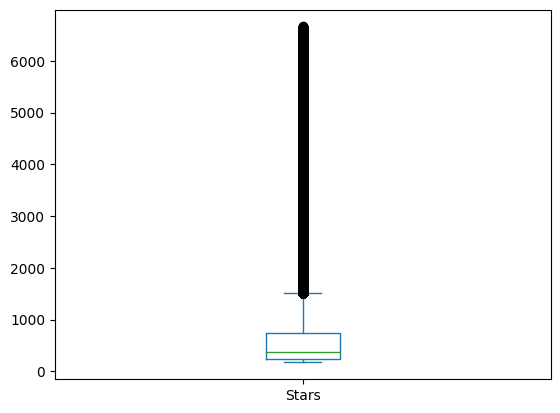

In [ ]:
data['Stars'].plot(kind='box')
pass

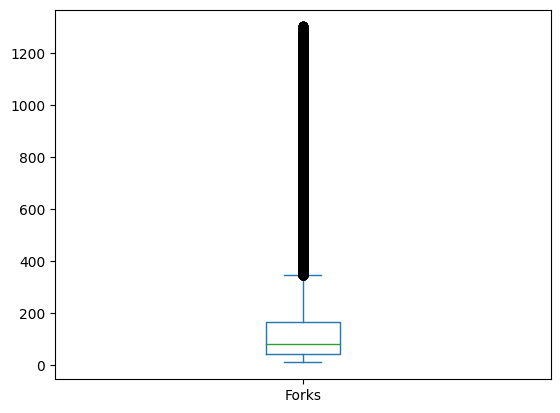

In [ ]:
data['Forks'].plot(kind='box')
pass

Другой способ обнаружения выбросов. Можно воспользоваться эвристическим правилом, что все примеры за границами интервала $[Q_1-1.5\cdot{\rm IQR},\, Q_3+1.5\cdot{\rm IQR}]$ являются выбросами.

In [ ]:
Q1, Q3 = data_raw['Stars'].quantile([.25, .75])
IQR = Q3 - Q1
stars_lower = Q1 - 1.5*IQR
stars_upper = Q3 + 1.5*IQR

In [ ]:
Q1, Q3 = data_raw['Forks'].quantile([.25, .75])
IQR = Q3 - Q1
forks_lower = Q1 - 1.5*IQR
forks_upper = Q3 + 1.5*IQR

In [ ]:
rows_to_drop = data_raw[
    (data_raw['Stars'] < stars_lower) | (data_raw['Stars'] > stars_upper) |
    (data_raw['Forks']  < forks_lower)  | (data_raw['Forks']  > forks_upper)].index
data = data_raw.drop(rows_to_drop)
data.shape


(180880, 24)

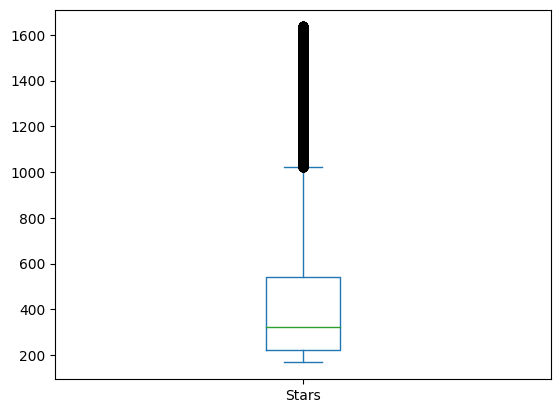

In [ ]:
data['Stars'].plot(kind='box')
pass

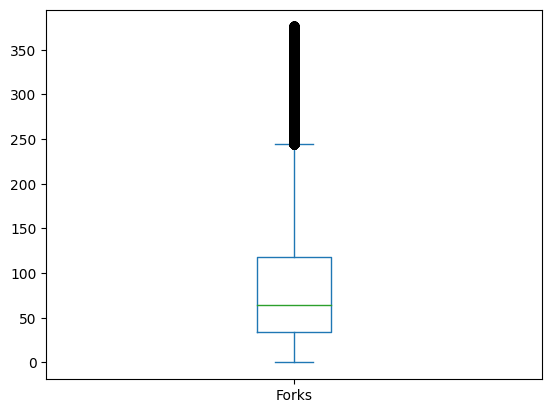

In [ ]:
data['Forks'].plot(kind='box')
pass

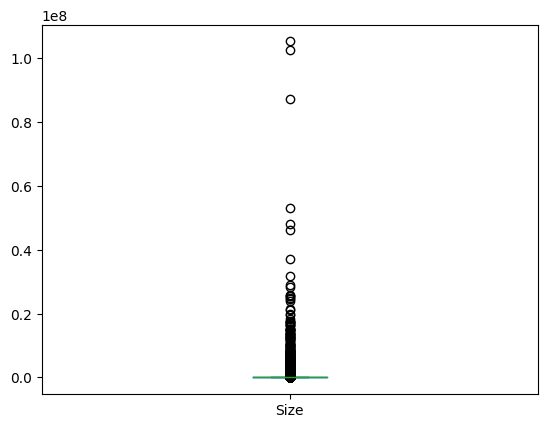

In [ ]:
data['Size'].plot(kind='box')
pass

Не будем улучшать для Size, иначе появятся проблемы со всеми остальными графиками

In [ ]:
rows_to_drop = data[
    (data['Size'] < data['Size'].quantile(0.005)) | (data['Size'] > data['Size'].quantile(0.995))].index
data = data.drop(rows_to_drop)

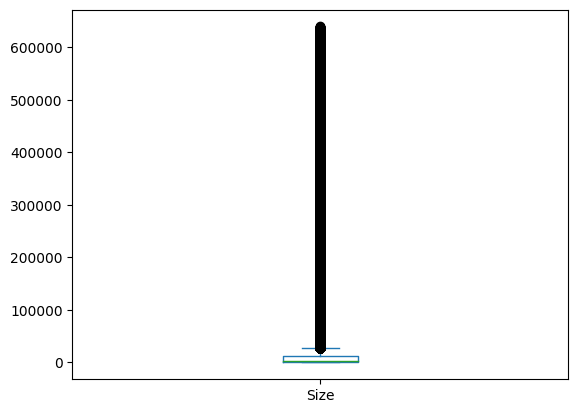

In [ ]:
data['Size'].plot(kind='box')
pass

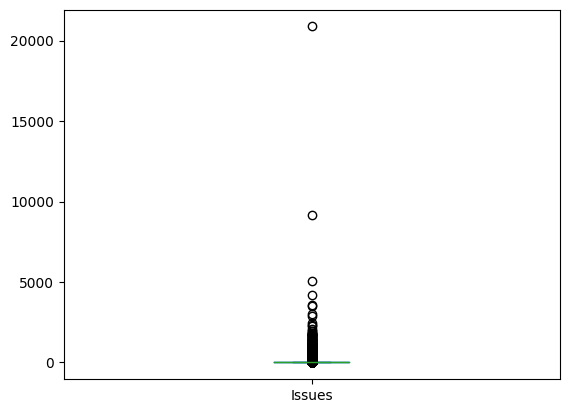

In [ ]:
data['Issues'].plot(kind='box')
pass

In [ ]:
rows_to_drop = data[
    (data['Issues'] < data['Issues'].quantile(0.005)) | (data['Issues'] > data['Issues'].quantile(0.995))].index
data = data.drop(rows_to_drop)

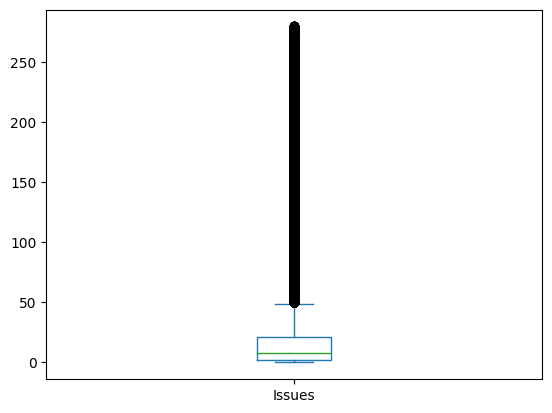

In [ ]:
data['Issues'].plot(kind='box')
pass

In [ ]:
# Q1, Q3 = data_raw['Size'].quantile([.25, .75])
# IQR = Q3 - Q1
# size_lower = Q1 - 1.5*IQR
# size_upper = Q3 + 1.5*IQR
# rows_to_drop = data_raw[
#     (data_raw['Size'] < size_lower) | (data_raw['Size'] > size_upper)].index
# data = data_raw.drop(rows_to_drop)
# data.shape

In [ ]:
data.describe()

,Size,Stars,Forks,Issues,Watchers
count,1.808800e+05,180880.000000,180880.000000,180880.000000,180880.000000
mean,4.417144e+04,440.122004,87.733365,21.668979,440.122004
std,5.868472e+05,308.379504,74.272271,88.532484,308.379504
min,0.000000e+00,167.000000,0.000000,0.000000,167.000000
25%,3.150000e+02,223.000000,34.000000,2.000000,223.000000
50%,1.907000e+03,321.000000,64.000000,8.000000,321.000000
75%,1.220000e+04,543.000000,118.000000,21.000000,543.000000
max,1.050786e+08,1637.000000,376.000000,20875.000000,1637.000000


In [ ]:
data.describe(include=['category'])

,Name,Description,URL,Created At,Updated At,Homepage,Language,License,Topics,Default Branch
count,180879,173731,180880,180880,180880,60860,180880,180880,180880,180880
unique,168624,173203,180880,180819,165999,58440,180880,180880,180880,1919
top,dotfiles,Migrated:,https://github.com/0-8-4/miui-auto-tasks,2017-06-05T20:53:58Z,2023-06-22T20:19:05Z,https://spatie.be/open-source,https://github.com/0-8-4/miui-auto-tasks,https://github.com/0-8-4/miui-auto-tasks,https://github.com/0-8-4/miui-auto-tasks,master
freq,183,32,1,3,10,31,1,1,1,138208


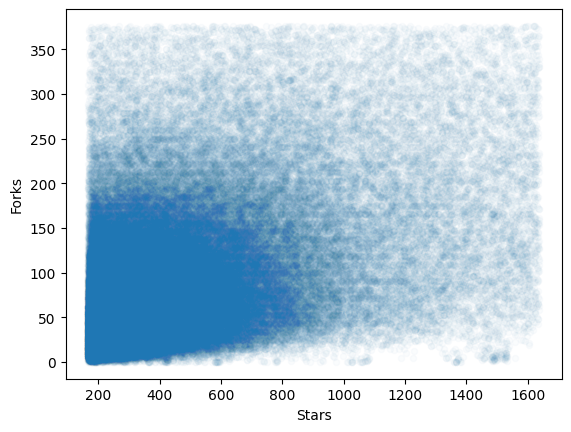

In [ ]:
data.plot(kind = 'scatter', x = 'Stars', y = 'Forks', alpha=.02)
pass

Зависимость между `Stars` и `Forks` совершенно не прослеживается.Есть крупный кластер для небольших значений, но понятно, что, чем меньше звёзд и форков, тем больше репозиториев с такими признаками.

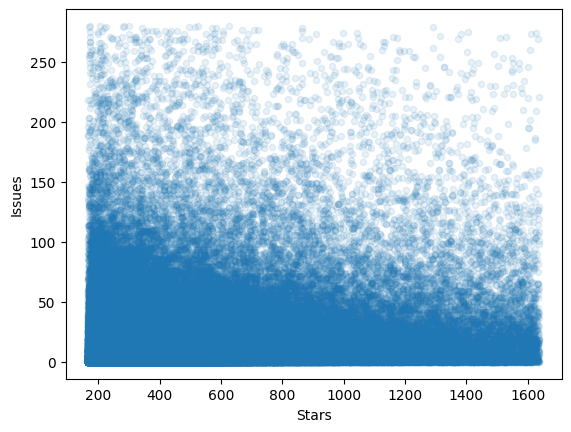

In [ ]:
data.plot(kind = 'scatter', x = 'Stars', y = 'Issues', alpha=0.1)
pass

Зависимость между `Stars` и `Issues` также не прослеживается явно.

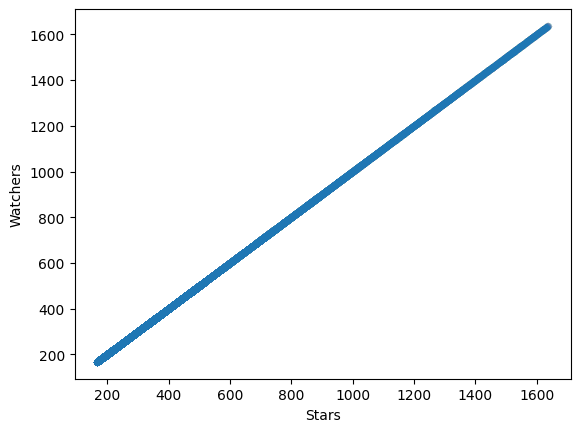

In [ ]:
data.plot(kind = 'scatter', x = 'Stars', y = 'Watchers', alpha=0.01)
pass

А вот между `Stars` и `Watchers` идеально чётко видна прямая зависимость. Это и логично: чем больше людей следят за репозиторием, тем больше звёзд можно получить. Однако необычно настолько полное совпадение интуитивной догадки и экспериментальных данных.

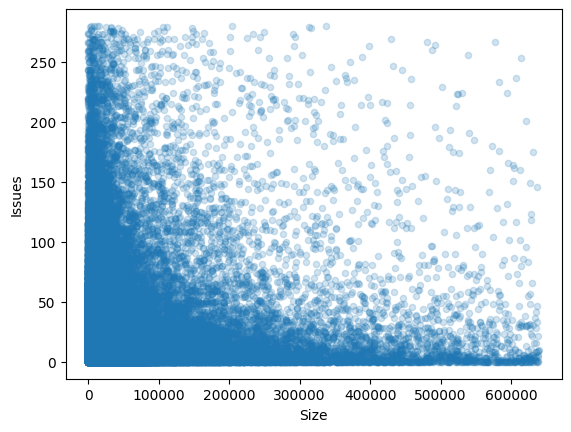

In [ ]:
data.plot(kind = 'scatter', x = 'Size', y = 'Issues', alpha=.2)
pass

Зависимость между `Size` и `Issues` напоминает обратную: диаграмма похожа на гиперболу.

In [ ]:
# data.plot(kind = 'scatter', x = 'Lng', y = 'Lat', alpha=0.05)
# #plt.scatter(data['Lng'], data['Lat'], alpha=0.01)
# plt.xlim([43.7, 44.1])
# plt.ylim([56.2, 56.4])
# pass

Интересно посмотреть, сколько раз номинальные переменные принимают то или иное значение

In [ ]:
data['Name'].value_counts()

dotfiles               182
blog                   147
core                    71
docs                    57
examples                56
                      ... 
cal.com                  0
socket.io-website        0
cal-heatmap              0
php_rest_myblog          0
JavaScript-Is-Weird      0
Name: Name, Length: 196820, dtype: int64

In [ ]:
sns.countplot(x='Name', data=data)
pass

KeyboardInterrupt: 

In [ ]:
data['Building'].value_counts().index

In [ ]:
sns.countplot(x='Building', data=data)
pass

In [ ]:
sns.countplot(x='Building', order=data['Building'].value_counts().index, data=data)
pass

In [ ]:
sns.countplot(x='Building', order=data['Building'].value_counts().index, hue='Type', data=data)
pass

In [ ]:
sns.countplot(x='Type', hue='Building', data=data)
pass

Для отрисовки диаграммы рассеивания мы можем воспользоваться более продвинутой функцией `scatterplot` из модуля `seaborn`. Например, в следующей диаграмме цвет маркеров соответствует типу строения `'Building'`, а размер - количеству комнат `'Rooms'`:

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Area', y='Price', size='Rooms', hue='Building', data=data, alpha=0.1)
pass

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Lng', y='Lat', hue='Price', data=data, alpha=0.5)
plt.xlim([43.7, 44.1])
plt.ylim([56.2, 56.4])
pass

Мы видим, что наблюдается ожидаемая корреляция между количеством комнат и площадью квартиры. Также можно увидеть, что квартиры в панельных домах, как правило, имеют умеренные размеры и умеренные цены. Квартиры в монолитных домах, как правило, больше и дороже. Кирпичные дома бываю в разной ценовой категории, но самые большие и дорогие квартиры - в основном в кирпичных домах.

Построим все возможные диаграммы рассеивания для каждой пары переменных:

In [ ]:
sns.pairplot(data.sample(1000), hue='Building', diag_kind='hist')
pass

На диаграммах, в частности, наблюдается попарная корреляция между `Price`, `Area` и `Rooms`.

На диагонали расположены гистограммы распределения признаков. Гистограммы можно построить отдельно.

Построить гистограмму можно с помощю функции `plt.hist` или `pd.hist`, но мы воспользуемся `displot` из библиотеки `seaborn`.

In [ ]:
sns.displot(data['Price'], bins=15, kde=True)
plt.grid()
pass

Можно представить вместе и диаграмму рассеивания для пары признаков и соответствующие гистограммы:

In [ ]:
sns.jointplot(x='Area', y='Price', alpha=.05, data=data)
pass

In [ ]:
sns.displot(data['Area'], bins = 20, kde=True)
pass

In [ ]:
sns.displot(data['Date'], bins = 15, kde=True)
pass

*Ящик с усами* (*бокс-диаграмма*) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

In [ ]:
sns.boxplot(x="Building", y="Price", data=data)
pass

In [ ]:
sns.boxplot(x="Building", y="Area", hue="Type", data=data)
pass

Также информацию о характере распределения можно получить из *скрипичных графиков* (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

In [ ]:
sns.violinplot(x="Building", y="Price", data=data)
pass

In [ ]:
sns.violinplot(x="Building", y="Price", hue="Type", split=True, data=data)
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [ ]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,Size,Stars,Forks,Issues,Watchers,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template
Size,1.000000,0.023056,0.097097,0.113232,0.023056,-0.031290,0.003839,-0.009548,0.006361,0.060608,0.071795,NaN,-0.019191,-0.006750
Stars,0.023056,1.000000,0.482188,0.200592,1.000000,0.000952,-0.059419,-0.012979,-0.062650,0.051584,0.088954,NaN,-0.007495,-0.005741
Forks,0.097097,0.482188,1.000000,0.255068,0.482188,-0.047466,0.032173,-0.030761,0.010183,0.013691,-0.015471,NaN,0.020766,0.015485
Issues,0.113232,0.200592,0.255068,1.000000,0.200592,0.056619,-0.014437,-0.031519,-0.046511,0.095554,0.140524,NaN,-0.006756,-0.022348
Watchers,0.023056,1.000000,0.482188,0.200592,1.000000,0.000952,-0.059419,-0.012979,-0.062650,0.051584,0.088954,NaN,-0.007495,-0.005741
Has Issues,-0.031290,0.000952,-0.047466,0.056619,0.000952,1.000000,0.184521,0.074904,0.225415,0.016243,0.033505,NaN,-0.115648,-0.001595
Has Projects,0.003839,-0.059419,0.032173,-0.014437,-0.059419,0.184521,1.000000,0.029856,0.616935,-0.035054,-0.117734,NaN,-0.045938,-0.021854
Has Downloads,-0.009548,-0.012979,-0.030761,-0.031519,-0.012979,0.074904,0.029856,1.000000,0.115412,-0.003518,0.004450,NaN,-0.032948,0.003776
Has Wiki,0.006361,-0.062650,0.010183,-0.046511,-0.062650,0.225415,0.616935,0.115412,1.000000,-0.054283,-0.110114,NaN,-0.082745,-0.012987
Has Pages,0.060608,0.051584,0.013691,0.095554,0.051584,0.016243,-0.035054,-0.003518,-0.054283,1.000000,0.090604,NaN,0.006691,0.002002


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

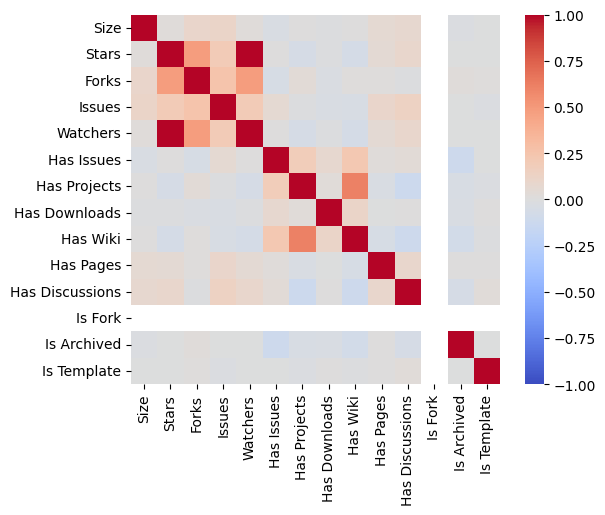

In [ ]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

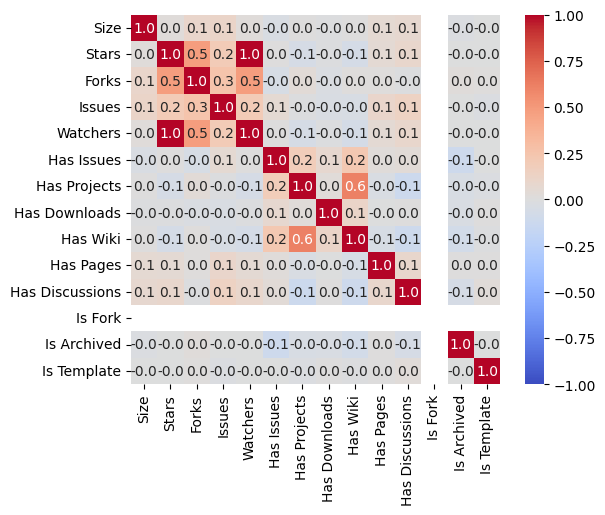

In [ ]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [ ]:
corr_mat > 0.5

,Size,Stars,Forks,Issues,Watchers,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template
Size,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Stars,False,True,False,False,True,False,False,False,False,False,False,False,False,False
Forks,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Issues,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Watchers,False,True,False,False,True,False,False,False,False,False,False,False,False,False
Has Issues,False,False,False,False,False,True,False,False,False,False,False,False,False,False
Has Projects,False,False,False,False,False,False,True,False,True,False,False,False,False,False
Has Downloads,False,False,False,False,False,False,False,True,False,False,False,False,False,False
Has Wiki,False,False,False,False,False,False,True,False,True,False,False,False,False,False
Has Pages,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
np.triu(corr_mat, k=1)

array([[ 0.00000000e+00,  2.30564931e-02,  9.70970806e-02,
         1.13232410e-01,  2.30564931e-02, -3.12901371e-02,
         3.83893151e-03, -9.54810208e-03,  6.36135239e-03,
         6.06079370e-02,  7.17948223e-02,             nan,
        -1.91913057e-02, -6.74985542e-03],
       [ 0.00000000e+00,  0.00000000e+00,  4.82187578e-01,
         2.00591958e-01,  1.00000000e+00,  9.52061879e-04,
        -5.94189713e-02, -1.29785172e-02, -6.26504597e-02,
         5.15835102e-02,  8.89542632e-02,             nan,
        -7.49544452e-03, -5.74129601e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.55067834e-01,  4.82187578e-01, -4.74662281e-02,
         3.21730220e-02, -3.07611089e-02,  1.01829777e-02,
         1.36909290e-02, -1.54707748e-02,             nan,
         2.07659335e-02,  1.54852969e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.00591958e-01,  5.66193096e-02,
        -1.44367001e-02, -3.15191199e-02, -4.

In [ ]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack()

Stars         Watchers    1.000000
Has Projects  Has Wiki    0.616935
dtype: float64

In [ ]:
corr_mat.where(np.triu(np.abs(corr_mat) > 0.5, k=1)).stack().sort_values(ascending=False)

Stars         Watchers    1.000000
Has Projects  Has Wiki    0.616935
dtype: float64

Достаточно большие значения этих коэффициентов вполне объяснимы.

Обратите внимание на небольшую корреляцию между ценой квартиры и географическими координатами (квартиры в нагорной части и особенно в нижегородском районе - дороже):

In [ ]:
corr_mat.loc['Stars', 'Forks'], corr_mat.loc['Stars', 'Watchers']

(0.48218757791197997, 1.0)

Также обратите внимание, что коэффициент корреляции между `'Stars'`, `'Size'` практически равен нулю

In [ ]:
corr_mat.loc['Stars', 'Size']

0.023056493060695953

Например, выберем все данные, соответствующие квартирам в деревянных строениях ценой больше 3 млн. и выше:

In [ ]:
data.loc[(data['Building']=='Wooden') & (data['Price'] >= 3000), :]

Или все данные, соответствующие продажам в деревянных новостройках:

In [ ]:
data.loc[(data['Building']=='Wooden') & (data['Type']=='New'), :]

Значения, которые принимают категориальные признаки, можно получить следующим образом:

In [ ]:
data['Name'].unique()

['simplify', 'axios-retry', 'Email-Framework', 'is', 'terraform-best-practices', ..., 'TouchyBP', 'puppet-virt', 'BounceProgressBar', 'egghead-angularjs-from-scratch-getting-started', 'Pcode']
Length: 164756
Categories (196820, object): ['-', '--', '---', '--Awesome-Python--', ..., 'zzkia', 'zzuf',
                              'zzuli-healthreport', 'zzzzz']

In [ ]:
data['Building'].unique()

## 3. Обучающая и тестовая выборки

Для предсказания количества звёзд у репозитория (`Stars`) будем использовать все входные признаки, кроме `Size` (нулевая корреляция с любым признаком, кроме себя), `Is Fork` (корреляция даёт NaN значения), `Is Template` (нулевая корреляция с любым признаком, кроме себя).

In [ ]:
X = data_raw.drop(['Stars', 'Size', 'Is Fork', 'Is Template'], axis=1)
y = data_raw['Stars']

Разобьём данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(161271, 53758)

##  4. Заполнение пропущенных значений

Пропущенные значения в таблице представлены значениями `np.nan`.
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:
`na` - not available

In [ ]:
X_train.isna().sum()

Name                    0
Description          6032
URL                     0
Created At              0
Updated At              0
Homepage           102444
Forks                   0
Issues                  0
Watchers                0
Language                0
License                 0
Topics                  0
Has Issues              0
Has Projects            0
Has Downloads           0
Has Wiki                0
Has Pages               0
Has Discussions         0
Is Archived             0
Default Branch          0
dtype: int64

In [ ]:
X_test.isna().sum()

Name                   2
Description         2000
URL                    0
Created At             0
Updated At             0
Homepage           34195
Forks                  0
Issues                 0
Watchers               0
Language               0
License                0
Topics                 0
Has Issues             0
Has Projects           0
Has Downloads          0
Has Wiki               0
Has Pages              0
Has Discussions        0
Is Archived            0
Default Branch         0
dtype: int64

С пропущенными значениями надо что-то сделать. Например, можно просто удалить строки с пропущенными значениями. В нашем случае это неразумно, так как таких строк слишком много. Нужно удалить столбцы с пропущенными значениями. Кроме того, это сделать можно хотя бы потому, что `Homepage` и `Description` никак не влияют на количество звёзд. Проверка: если данных осталось мало, то простые стратегии неприменимы. Проверку проходит $⇒$ можем использовать.

Простая разумная стратегия для удаления пропущенных значений в строках - заполнить пропущенные значения медианой или средним (для количественных признаков) или модой (для номинальных признаков).

In [ ]:
# from sklearn.impute import SimpleImputer
# imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
# imp_num.fit(X_train[['Floors', 'Rooms', 'Floor', 'Area']])

In [ ]:
# X_train[['Floors', 'Rooms', 'Floor', 'Area']] = imp_num.transform(X_train[['Floors', 'Rooms', 'Floor', 'Area']])

Заполним наиболее частыми значения в столбцах, соответствующих категориальным признакам/ Еще можно ввести новый признак - индикатор пропущенного значения (легко сделать при бинаризации ниже).

In [ ]:
# from sklearn.impute import SimpleImputer
# imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imp_cat.fit(X_train[['Type', 'Building']])

In [ ]:
# X_train[['Type', 'Building']] = imp_cat.transform(X_train[['Type', 'Building']])

Удалим "вредные" столбцы:

In [ ]:
X_train = X_train.drop(['Description','Homepage'], axis=1)
X_test = X_test.drop(['Description','Homepage'], axis=1)
pass

In [ ]:
X_train.shape

(161271, 18)

In [ ]:
X_test.shape

(53758, 18)

In [ ]:
X_train.isna().sum()

Name               0
URL                0
Created At         0
Updated At         0
Forks              0
Issues             0
Watchers           0
Language           0
License            0
Topics             0
Has Issues         0
Has Projects       0
Has Downloads      0
Has Wiki           0
Has Pages          0
Has Discussions    0
Is Archived        0
Default Branch     0
dtype: int64

In [ ]:
X_test.isna().sum()

Name               2
URL                0
Created At         0
Updated At         0
Forks              0
Issues             0
Watchers           0
Language           0
License            0
Topics             0
Has Issues         0
Has Projects       0
Has Downloads      0
Has Wiki           0
Has Pages          0
Has Discussions    0
Is Archived        0
Default Branch     0
dtype: int64

## 5. Бинаризация номинальных признаков

Алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками. Поэтому их вначале надо закодировать с помощью числовых принаков.

Бинарный признак `'Type'` заменим на числовой.

`'Resale'` → 0, `'New'`→ 1

К категориальному (небинарному) признаку `'Building'` применим метод *бинаризации* (*one-hot encoding*),
который заключается в следующем.

Этот признак принимает 5 значений: `'Block'`, `'Brick'`, `'Monolithic'`, `'Panel'`, `'Wooden'`.

Вместо признака `'Building'` будем использовать 5 новых признаков (dummy-признаков, dummy - фиктивный), которые так и назовем `'Building_Block'`, `'Building_Brick'`, `'Building_Monolithic'`, `'Building_Panel'`, `'Building_Wooden'`. При этом
- если признак `'Building'` принимает значение `'Block'`, то признак `'Building_Block'` равен 1, а все остальные 0;
- если признак `'Building'` принимает значение `'Brick'`, то признак `'Building_Brick'` равен 1, а все остальные 0
- и т.д.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(X_train[['Type', 'Building']])

In [ ]:
dummies = pd.DataFrame(enc.transform(X_train[['Type', 'Building']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)
dummies.head()

Добавим эти dummy-столбцы к таблице и удалим столбцы `Type`, `Building`:

In [ ]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['Type', 'Building'], axis=1)

In [ ]:
X_train.head()

## 6. Масштабирование количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из трех следующих способов:
- *приведение к отрезку $[0,1]$* - это линейное преобразование, приводящее все значения к заданному отрезку;
- *стандартизация* - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению;
- *нормализация* - приведение данных к единичной норме.

Выполним стандартизацию всех признаков:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [ ]:
X_train.describe()

# 7. Обучаем модель

## Линейная регрессия

- Создаем модель и задаем гиперпараметры (конструктор)
- Тренируем модель (метод `fit`)
- Используем модель на новых данных (метод `predict`) и измеряем качество модели

Ищем коэффициенты (веса) $\beta_0, \beta_1, \dots, \beta_d$ _линейной модели_
$$
f(x) = \beta_0 + \sum_{j=1}^d \beta_j x_j,
$$
минимизирующие остаточную сумму квадратов
$$
{\rm RSS} = \sum_{i=1}^N \left(f(x^{(i)}) - y^{(i)}\right)^2
$$

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_train_predict = model.predict(X_train)

In [ ]:
model.coef_

In [ ]:
y_train

In [ ]:
y_train_predict

In [ ]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

# 8.Тестируем модель

Мы сделали много преобразований с `X_train`. Чтобы нашу модель опробовать на `X_test`, надо вначале с `X_test` выполнить те же преобразования.  

In [ ]:
# Заполнение пропущенных значений:
X_test[['Floors', 'Rooms', 'Floor', 'Area']] = imp_num.transform(
    X_test[['Floors', 'Rooms', 'Floor', 'Area']])
X_test[['Type', 'Building']] = imp_cat.transform(X_test[['Type', 'Building']])

# One-hot encoding:
dummies = pd.DataFrame(enc.transform(X_test[['Type', 'Building']]),
                       columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dummies), axis=1).drop(['Type', 'Building'], axis=1)

# Масштабирование:
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns, index=X_test.index)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

### Измеряем метрики качества

*Остаточная сумма квадратов* (*residual sum of squares*):
$$
{\rm RSS} = \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$
где
$$
\widehat{y}^{(i)} = \beta_0 + \sum_{j=1}^d \beta_j x_j^{(i)}
$$

*Полная сумма квадратов*:
$$
{\rm TSS} = \sum_{i=1}^N \left(y^{(i)} - \overline{y} \right)^2,
$$
где
$$
\overline{y} = \frac{1}{N} \sum_{i=1}^N y^{(i)}
$$

$$
\overline{y} = \beta_0 + \sum_{j=1}^d \beta_j \overline{x}_j
$$


*Сумма квадратов, обусловленная регрессией*:
$$
{\rm ESS} = \sum_{i=1}^N \left(\overline{y} - \widehat{y}^{(i)} \right)^2
$$

Можно показать, что
$$
{\rm TSS} = {\rm RSS} + {\rm ESS}
$$

*Коэффициент детерминации*, или *коэффициент регрессии Пирсона*:
$$
R^2 = 1 - \frac{{\rm RSS}}{{\rm TSS}} = \frac{{\rm ESS}}{{\rm TSS}}
$$
— доля объясняемого регрессией разброса относительно среднего (чем ближе к 1, тем модель лучше объясняет данные).

$$
0 \le R^2 \le 1
$$

$R = \sqrt{R^2}$ равно (по модулю) выборочной корреляции между $y^{(i)}$ и $\widehat{y}^{(i)}$

Если $d = 1$, то $R$ равен (по модулю) выборочной корреляции между $y^{(i)}$ и $x^{(i)}$.

*Средняя сумма квадратов отклонений* (MSE - Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} {\rm RSS} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - \widehat{y}^{(i)} \right)^2
$$

*Среднеквадратическая ошибка* (RMSE - Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

Для вычисления этих метрик можно воспользоваться соответствующими функциями из модуля `metrics` библиотеки `sklearn`, но можно также вычислить "вручную". Значение $R^2$ также вычисляет метод `score` объекта `LinearRegression`

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

In [ ]:
model.score(X_train, y_train) # Коэффициент детерминации R^2

In [ ]:
model.score(X_test, y_test)

In [ ]:
#MSE_train = np.mean((y_train_predict - y_train)**2)
#MSE_test  = np.mean((y_test_predict - y_test)**2)
MSE_train = ((y_train_predict - y_train)**2).mean()
MSE_test  = ((y_test_predict - y_test)**2).mean()
MSE_train, MSE_test

In [ ]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

In [ ]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['Linear Regression, all features', :] = (RMSE_train, RMSE_test)

In [ ]:
RMSE_table

In [ ]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['Linear Regression, all features', :] = (R2_train, R2_test)
R2_table

### Если предсказывать цену только по площади квартиры?

Попробуем построить линейную модель, описывающую зависимость `Price` только от `Area`

In [ ]:
model = LinearRegression()
model.fit(X_train[['Area']], y_train)

y_train_predict = model.predict(X_train[['Area']])
y_test_predict  = model.predict(X_test[['Area']])

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [ ]:
RMSE_table.loc['Linear Regression, Area', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Area', :] = (R2_train, R2_test)
R2_table

### Как цена зависит от количества комнат?

Попробуем построить линейную модель, описывающую зависимость `Price` только от `Rooms`

In [ ]:
model = LinearRegression()
model.fit(X_train[['Rooms']], y_train)

y_train_predict = model.predict(X_train[['Rooms']])
y_test_predict  = model.predict(X_test[['Rooms']])

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [ ]:
RMSE_table.loc['Linear Regression, Rooms', :] = (RMSE_train, RMSE_test)
RMSE_table

Ошибка заметно возросла

In [ ]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Rooms', :] = (R2_train, R2_test)
R2_table

### Как цена зависит от площади и количества комнат?

Попробуем построить линейную модель, описывающую зависимость `Price` от `Area` и `Rooms`

In [ ]:
model = LinearRegression()
model.fit(X_train[['Area', 'Rooms']], y_train)

y_train_predict = model.predict(X_train[['Area', 'Rooms']])
y_test_predict  = model.predict(X_test[['Area', 'Rooms']])

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5

In [ ]:
RMSE_table.loc['Linear Regression, Area & Rooms', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
R2_table.loc['Linear Regression, Area & Rooms', :] = (R2_train, R2_test)
R2_table

## 9.1 Метод $k$ ближайших соседей ($k$NN, $k$ nearest neighbours)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=7) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [ ]:
RMSE_table.loc['k Nearest Neighbours', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_table.loc['k Nearest Neighbours', :] = (R2_train, R2_test)
R2_table

## 9.2 Полносвязная нейронная сеть (Full-connected Neural Network)

Full connected neural network, or multi-layer perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(20,10))
model.fit(X_train, y_train)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [ ]:
RMSE_table.loc['Neural Network', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_table.loc['Neural Network', :] = (R2_train, R2_test)
R2_table

## 9.3 Случайный лес (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [ ]:
RMSE_table.loc['Random Forest', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_table.loc['Random Forest', :] = (R2_train, R2_test)
R2_table

Метод Random Forest позволяет получить некоторые оценки "*важности*" признаков.
Чем значение больше, тем признак важнее.

In [ ]:
importances = model.feature_importances_
importances

In [ ]:
np.sum(importances)

In [ ]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

In [ ]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

## 9.4 Градиентный бустинг (Gradient Boosting)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=200) # по умолчанию n_estimators=100
model.fit(X_train, y_train)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

In [ ]:
RMSE_table.loc['Gradient Boosting', :] = (RMSE_train, RMSE_test)
RMSE_table

In [ ]:
R2_table.loc['Gradient Boosting', :] = (R2_train, R2_test)
R2_table

In [ ]:
importances = model.feature_importances_
importances

In [ ]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances

In [ ]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

# 10. Использование Pipeline

`Pipeline` - удобный инструмент, позволяющий соединять вместе предобработку и основные методы модели

In [ ]:
X = data_raw.drop(['Price'], axis=1)
y = data_raw['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector

In [ ]:
!pip install feature_engine
from feature_engine.selection import DropFeatures

## 10.1 Линейная регрессия

In [ ]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Добавляем новые признаки:
    ('poly_feature', PolynomialFeatures(degree=3)),
    # Обучение:
    ('fit', LinearRegression())
])

In [ ]:
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

## 10.2 *k*NN

In [ ]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Обучение:
    ('fit', KNeighborsRegressor())
])

## Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

k_arr = np.array([1, 2, 3, 4, 5, 7, 10, 15, 20, 30, 40, 50])

params = {
    'fit__n_neighbors': k_arr,
}

model = GridSearchCV(ppl, params, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

model.best_score_, model.best_params_

In [ ]:
MSE_arr = -model.cv_results_['mean_test_score']
std_arr = model.cv_results_['std_test_score']
plt.plot(k_arr, MSE_arr, 'r.-')
plt.fill_between(k_arr, MSE_arr - std_arr, MSE_arr + std_arr, alpha=0.15, facecolor='red')
plt.xlim([max(k_arr), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')
pass

Теперь обучим модель при найденом оптимальном значении гиперпараметра:

In [ ]:
ppl.set_params(fit__n_neighbors=model.best_params_['fit__n_neighbors'])
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

## 10.3 Random Forests

In [ ]:
ppl = Pipeline([
    # Удаляем нерелевантный признак:
    ('drop_column', DropFeatures(['Date'])),
    # Заполнение пропущенных значений:
    ('impute', ColumnTransformer([
        # Заполнение пропущенных числовых признаков:
        ('num', make_pipeline(
            SimpleImputer(strategy='median'),
            StandardScaler()),
            make_column_selector(dtype_include='float')
        ),
        # Заполнение пропущенных категориальных признаков:
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder()),
            make_column_selector(dtype_include='category')
        )])
    ),
    # Обучение:
    ('fit', RandomForestRegressor())
])


In [ ]:
ppl.fit(X_train, y_train)
y_train_predict = ppl.predict(X_train)
y_test_predict = ppl.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
RMSE_train, RMSE_test

## **Сводка метрик качества в задачах регрессии**

*Средняя сумма квадратов отклонений* (MSE — Mean Squared Error)
$$
{\rm MSE} = \frac{1}{N} \sum_{i=1}^N \left(y^{(i)} - f(x^{(i)}) \right)^2
$$

*Среднеквадратическая ошибка* (RMSE — Rooted Mean Squared Error)
$$
{\rm RMSE} = \sqrt{{\rm MSE}}
$$

MSE иногда называют *средней квадратической ошибкой*, что, конечно же, правильней отражает суть дела, но добавляет путаницы.

*Cредняя абсолютная ошибка* (MAE — Mean Absolute Error)
$$
{\rm MAE} = \frac{1}{N} \sum_{i=1}^N \left|y^{(i)} - f(x^{(i)}) \right|
$$

*Коэффициент детерминации (Пирсона)*
$$
R^2 = 1 - \frac{\sum_{i=1}^N \left(y^{(i)} - f(x^{(i)}) \right)^2}{\sum_{i=1}^N \left(y^{(i)} - \overline{y}\right)^2}
$$

$R^2$ — фактически это нормированная среднеквадратичная ошибка, она измеряет долю дисперсии, объясненную моделью, в общей дисперсии $y$.

*Средняя абсолютная процентная ошибка* (MAPE — Mean Absolute Percentage Error)

$$
{\rm MAPE} = 100\%\times\frac{1}{N} \sum_{i=1}^N \frac{\left|y^{(i)} - f(x^{(i)}) \right|}{|y^{(i)}|}
$$

*Cимметричная* MAPE (SMAPE — Symmetric MAPE)

$$
{\rm SMAPE} = 100\%\times\frac{1}{N} \sum_{i=1}^N \frac{2\times\left|y^{(i)} - f(x^{(i)}) \right|}{|y^{(i)}| + |f(x^{(i)})|}
$$